# Assignment 2 - Epipolar Geometry and 3D Reconstruction 

First name: Alice 
<br>
Last name: Fornaciari
<br>
Matriculation number: 110068805

In [9]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from data import load_homogeneous_coordinates
from utils import eight_points_algorithm, right_epipole,  plot_epipolar_line


## Part I: The Eight Point Algorithm

### Load Data

In [10]:
data_dir = './merton_college/'
img1, img2, x1, x2 = load_homogeneous_coordinates(data_dir)

### Estimate the fundamental matrix F

In [11]:
F = eight_points_algorithm(x1, x2) #x1 and x2 are the homogenwous coordinates of the projection points
assert np.linalg.matrix_rank(F) == 2
 #DISPLAY the Fundammental matrix
print('Estimated fundamental matrix F: ')
print(F)

msd =  200.61030549161194
msd =  206.62617849816388
F normalized =  [[-2.15199340e-04 -1.01993593e-02  1.12665934e-02]
 [ 3.09889540e-02  1.31285386e-03 -7.00901786e-01]
 [-3.25968396e-02  7.11674758e-01 -3.50571610e-04]]
F_n = [[-3.25397382e-05 -1.01909897e-02  1.12746858e-02]
 [ 3.09918909e-02  1.31298843e-03 -7.00901656e-01]
 [-3.25942294e-02  7.11674878e-01 -3.50455970e-04]]
Estimated fundamental matrix F: 
[[-1.57002102e-09 -4.91708566e-07  2.02472348e-04]
 [ 1.49533841e-06  6.33508305e-08 -5.62143680e-03]
 [-6.21951336e-04  5.26831393e-03  2.21174305e-01]]


### Plot epipoles and epipolar lines

In [12]:
# compute the epipole
# TODO: implement this function
e_r = right_epipole(F, type="right") #Right epipole
print ("Right epipole =", e_r)  
e_l= right_epipole(F, type="left") #Left epipole --> will use F.T
print ("Left epipole =", e_l)  

Right epipole = [3.74236869e+03 3.99823726e+02 1.00000000e+00]
Left epipole = [1.07693458e+04 4.27234018e+02 1.00000000e+00]


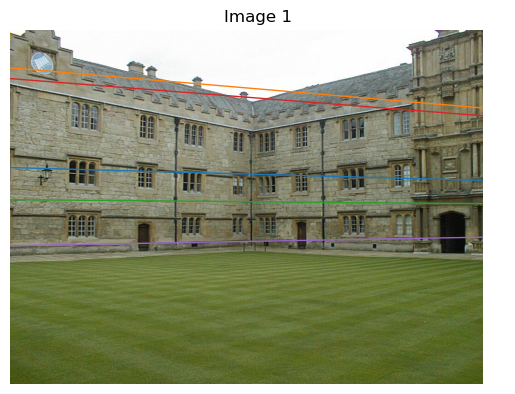

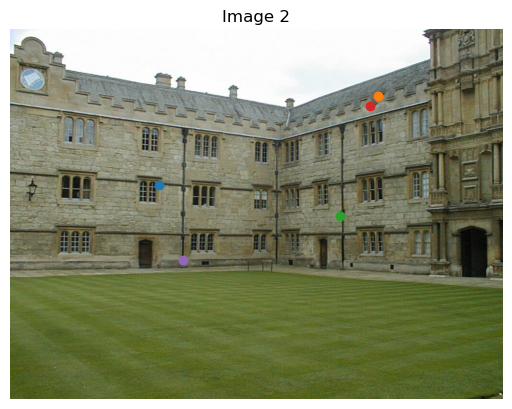

In [13]:
plt.figure()
plt.imshow(img1)
plt.title('Image 1')

# plot each line individually, this gives nice colors --> Right side
for i in range(100, 105): 
    plot_epipolar_line(img1, F.T, x2[:, i], e_r, show_epipole=False) #it was e before

# plot each line individually --> Left side
# for i in range(100, 105): 
#     plot_epipolar_line(img2, F.T, x2[:, i], e_l, ax=None, show_epipole=False)    

plt.axis('off')
plt.figure()
plt.imshow(img2)
plt.title('Image 2')

#for i in range(100, 105): 
#    plot_epipolar_line(img2, F.T, x2[:, i], e_left, ax=None, show_epipole=True)

# plot each point individually, this gives same colors as the lines 
for i in range(100, 105):
    plt.plot(x2[0, i], x2[1, i], 'o')
    plt.axis('off')

In [14]:
# ????????? cosa devo fare???????????
%matplotlib notebook
from ipywidgets import *

fig, ax = plt.subplots()
ax.imshow(img1)
#plt.savefig("picture1")

fig2, ax2 = plt.subplots()
ax2.imshow(img2)



def onclick(event):
    ax.plot(event.xdata, event.ydata, 'o')
    plot_epipolar_line(img2, F, np.array([event.xdata, event.ydata, 1]), e_l, ax2)
    ax2.imshow(img2)
    #plt.savefig("picture")

cid = fig.canvas.mpl_connect('button_press_event', onclick)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>